# Phase Kickback

In this page, we'll cover a behaviour of controlled quantum gates known as "phase kickback". This interesting quantum effect is a building block in many famous quantum algorithms, including Shor's factoring algorithm, and Grover's search algorithm.

## Eigenvectors

You should already be familiar with eigenvectors and eigenvalues, but if not, you can read a nice introduction [here](https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors). If you _are_ familiar, then you should recognise the eigenvector equation:

$$ \class{_matrix-A}{A}\class{_eig-vec-A}{|x\rangle} = \class{_eig-val-A}{\lambda}\class{_eig-vec-A}{|x\rangle} $$

This is even simpler in quantum computing. Since all our state vectors have a magnitude of 1, our eigenvalues also need to have a magnitude of 1, i.e. $\lambda = e^{2\pi i \theta}$. So for a quantum gate $U$ and its eigenstate $|x\rangle$, we have:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

To sum up: If a gate rotates (and only rotates) all the amplitudes of a state vector by the same amount, then that state is an _eigenstate_ of that gate.


<!-- ::: q-block -->

### Exploring eigenvectors

Use the widget below to see how a single-qubit gate transforms a single-qubit state. Can you work out which states are eigenstates of which gates?

    q-eigenvector-widget

<!-- ::: -->

## Controlled gates & eigenstates

Once you're comfortable with the concept of eigenstates, we can start to think about what happens when we control these circuits on the state of another qubit. For example, we know the Z-gate acting on the state $|1\rangle$ introduces a negative global phase ($\theta = 0.5$), let's work out what happens when we control this operation.

<!-- ::: q-block.tabs -->

### The controlled-Z gate

<!-- ::: tab -->

### |10〉

<!-- ::: column(width=200) -->

If the control qubit is $|0\rangle$, then the behaviour is trivial; nothing happens.

<!-- ::: column(width=400) -->

![circuit diagram showing a two-qubit register in the state 01, acted on by a CZ-gate. The state is unchanged](images/kickback/tabs/0/0.svg)

<!-- ::: -->

<!-- ::: tab -->

### |11〉

<!-- ::: column(width=200) -->

If the control qubit is $|1\rangle$, the gate introduces a global phase (note the minus sign in the image to the right), but the qubit's states are unchanged.

<!-- ::: column(width=400) -->

![circuit diagram showing a two-qubit register in the state 01, acted on by a CZ-gate. The state is unchanged](images/kickback/tabs/0/1.svg)

<!-- ::: -->

<!-- ::: tab -->

### |1+〉

<!-- ::: column(width=200) -->

The controlled-Z gate does nothing when the control is $|0\rangle$, and introduces a negative phase when the control is $|1\rangle$. When the control qubit is in superposition, the gate changes the _relative_ phase between the $|0\rangle$ and $|1\rangle$ states of the control qubit.

<!-- ::: column(width=400) -->

![circuit diagram showing a two-qubit register in the state 01, acted on by a CZ-gate. The state is unchanged](images/kickback/tabs/0/2.svg)

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

When the control is $|{+}\rangle$, and the target is $|1\rangle$, the controlled-Z gate changes the state of the _control_ qubit, but leaves the target qubit unchanged. This effect is called "phase kickback", since the eigenvalue makes its way back into the state of the control qubit.

More generally, If we have a quantum gate $U$, and it's eigenstate $|x\rangle$, then $U$ acting on $|x\rangle$ will add a global phase $\theta$ as we saw above.

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

If we control the operation $U|x\rangle$ by another qubit in a superposition of $|0\rangle$ and $|1\rangle$, then this will have the effect of rotating the control qubit around the Z-axis by angle $\theta$. I.e.:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}|1\rangle)} $$

In the example above, we see that the 'control' of the controlled-Z gate is actually doing a Z-rotation; something that should have only been observing the qubit has actually changed it. For this reason, you will often see the controlled-Z gate drawn as two controls.

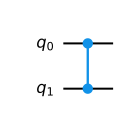

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw()

## The CNOT Gate

Let's look at the phase kickback effect with a different two-qubit gate. Since the $|{-}\rangle$ state is an eigenstate of the X-gate, with eigenvalue $-1$, we get:

$$ \class{_matrix-CX}{CX}\class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-post}{(\alpha|0\rangle - \beta |1\rangle)} $$

![](images/kickback/cnot-kickback.svg)

Again, in this case the phase change $\theta = 0.5$, so our control qubit is flipped around the Z-axis.

<!-- ::: q-block -->

### Worked example

<details>
    <summary>Kickback with the CNOT gate (click to expand)</summary>

    q-carousel
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-0.svg"><br>By definition, the controlled-X gate (CNOT) flips the state of the target qubit (in our example, the rightmost bit is the target) if the control qubit is $|1\rangle$. In the image above, we show the CNOT gate transforming one state vector to another.
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-1.svg"><br>For example, if the control qubit is in the state $|0\rangle$, then we always get the exact same statevector back. In the image above, the amplitudes of the states where the control is $|1\rangle$ are both zero, so we see no effect when we swap them.
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-2.svg"><br>Another example: If the control qubit is in the state $|1\rangle$, then we do an X-gate on the target qubit. In this case, the target qubit is in an eigenstate of the X-gate, so we get the same statevector back, up to global phase. This change is a global phase, since the relative phase between the $|0\rangle$ and $|1\rangle$ amplitudes of the target qubit stayed the same.
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-3.svg"><br>Let us look at the state vector when the control is in the state $|{+}\rangle$ (i.e. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$), and the target in the state $|{-}\rangle$ (i.e. $\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$). We can see these two qubits are separable, as measuring one does not affect the state of the other.
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-4.svg"><br> For example, regardless of whether we measure the control qubit as $|0\rangle$ or $|1\rangle$, the amplitudes for measuring the target as $|0\rangle$ or $|1\rangle$ stay the same.
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-5.svg"><br>With all this in mind, let's see what happens when we apply the CNOT to this $|{+}{-}\rangle$ state.
            div.md
                <img src="images/kickback/carousel/cnot/carousel-img-6.svg"><br>After the CNOT, these qubits are still separable, as the state of one does not change when we measure the other. However, the relative phase between the $|0\rangle$ and $|1\rangle$ amplitudes of the control qubit has changed!
    
</details>

<!-- ::: -->

When we remember that the H-gate does the transformation $|0\rangle \rightarrow |{+}\rangle$ and $|1\rangle \rightarrow |{-}\rangle$ (and vice versa), we get the following identity:

![](images/kickback/cnot-identity.svg)

## Deutsch's problem

We've just seen that conditioning an action on the state of a qubit can actually change the state of the controlling qubit. This is a 'quantum' effect, i.e., something we don't see happen with classical bits.

In quantum computing, we want to create algorithms that classical computers _can't_ carry out, so a good place to start is to try and reframe this effect as a problem to be solved. This way, we can prove quantum computers are at least slightly better at something than classical computers.

Deutsch's problem does exactly this. Deutsch's is a 'black box' problem; an artificial problem where we're allowed to apply a function to our bits, but we're not allowed to look at how the function works. The challenge is to discover some properties of the box by trying different inputs and outputs.

Deutsch's problem is as follows: We're given a classical, reversible function, (which we'll call $f$ as a shorthand), that acts on two bits, $ a $ & $ b $. The function will leave bit $ a $ alone, but may, or may not, flip bit $ b $. Deutsch's problem asks us to work out whether $f$ behaves differently depending on the value of $ a $ (we'll call this "balanced" behaviour), or if it ignores $ a $ and always does the same thing to $ b $ ("constant" behaviour). The challenge is to do this while applying $f$ as few times as possible.

![Image of deutsch's problem as a quantum circuit. The circuit has two bits, the top and bottom wires labelled 'a' and 'b' respectively. Both bits are then acted on by an opaque, two-bit gate labelled 'f'. After 'f', the top wire is still labelled 'f', but the bottom wire is now labelled 'f(a, b)'.](images/kickback/deutsch-problem.svg)

The best classical algorithm for this problem applies $f$ twice with different values of $ a $, then looks to see if the $f$ behaved differently.

## Deutsch's algorithm

As you may have guessed, we can use phase kickback to create a quantum algorithm that does even better than the classical algorithm. If we put qubit $ a $ in the $|{+}\rangle$ state, and qubit $ b $ in the $|{-}\rangle$ state, then any flip conditioned on $ a $ will kick back a negative relative phase, flipping qubit $ a $ from $|{+}\rangle$ to $|{-}\rangle$. We can then apply a H-gate to $ a $ to see whether kickback occurred or not.

![Image of deutsch's algorithm as a quantum circuit.](images/kickback/deutsch-algorithm.svg)

<!-- ::: q-block.reminder -->

### More info

<details>
    <summary>Inside the black box (click to expand)</summary>
If this still seems like magic, it can help to think about all the possible Deutsch functions and the quantum circuits that implement them. There are four possible Deutsch functions: two constant, and two balanced.

If constant, the function can either do nothing, or flip qubit $ b $. If balanced, the function can either flip $ b $ only when $ a $ is $|1\rangle$, or flip $ b $ only when $ a $ is $|0\rangle$. You can see all four scenarios in the image below.

<img src="images/kickback/deutsch-oracles.svg">

With both constant functions, the topmost qubit will remain unchanged (since we're not doing anything to it), and in the balanced functions, the kickback effect flips the topmost qubit from $|{+}\rangle$ to $|{-}\rangle$.
</details>

<!-- ::: -->

This isn't the most impressive example of quantum speedup; it's very specific, and we don't find black box problems in the wild. Instead, Deutsch's problem gives us an encouraging result, and some interesting effects to explore. In the rest of this course, we'll extend this simple experiment to solve even more impressive problems, including factoring.



<!-- ::: q-block.exercise -->

### Exercise

Make a function, `deutsch()` that takes a Deutsch function as a `QuantumCircuit` and uses the Deutsch algorithm to solve it on a quantum simulator. Your function should return `True` if the Deutsch funciton is balanced, and `False` if it's constant.

You can use the function `deutsch_problem()` to create a `QuantumCircuit` you can use as input to your `deutsch()` function.

<!-- ::: -->

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def deutsch_problem(seed=None):
    """Returns a circuit that carries out the function
    from Deutsch's problem.
    Args:
        seed (int): If set, then returned circuit will
            always be the same for the same seed.
    Returns: QuantumCircuit
    """
    np.random.seed(seed)
    problem = QuantumCircuit(2)
    if np.random.randint(2):
        print("Function is balanced.")
        problem.cx(0, 1)
    else:
        print("Function is constant.")
    if np.random.randint(2):
        problem.x(1)
    return problem

In [ ]:
def deutsch(function):
    """Implements Deutsch's algorithm.

    Args:
        function (QuantumCircuit): Deutsch function to solve.
            Must be a 2-qubit circuit, and either balanced,
            or constant.
    Returns:
        bool: True if the circuit is balanced, otherwise False.
    """

    # your code here

## Summary

In this page, we have:
- recapped the concept of eigenvalues and eigenvectors
- explored the phase kickback effect and covered some specific examples
- introduced Deutsch's problem as a scenario where quantum computers have an advantage over classical computers

If you forget everything else from this page, the most important thing to remember and be comfortable with is this summary of phase kickback below:

<!-- ::: q-block.reminder -->

### Reminder: Phase kickback

If we have a quantum gate $U$, and it's eigenstate $|x\rangle$, then $U$ acting on $|x\rangle$ will add a global phase $\theta$. I.e.:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\class{_eig-vec-U}{|x\rangle} $$

If we control the operation $U|x\rangle$ by another qubit in a superposition of $|0\rangle$ and $|1\rangle$, then this will have the effect of rotating the control qubit around the Z-axis by angle $\theta$. I.e.:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}|1\rangle)} $$

<!-- ::: -->